In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# Figure 2

In [2]:
male_data = pd.read_csv('patient_data_male.csv')
female_data = pd.read_csv('patient_data_female.csv')

male_data['male'] = True
female_data['male'] = False

data = pd.concat([male_data, female_data])

In [3]:
def g(Dev, A=100.0, n=4):
    return A * ((100 + Dev)**(n-1))

params = np.array([1.26975706e+03, 3.72981228e-01])

def ideal_weight(height, sex):
    if sex == 'male':
        return 176.3 - 2.206 * (height * 100.0) + 0.00935 * (height * 100.0) ** 2
    else:
        return 145.8 - 1.827 * (height * 100.0) + 0.007955 * (height * 100.0) ** 2

def hem(sex):
    if sex == 'male':
        return 0.45
    else:
        return 0.4 # Check value

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


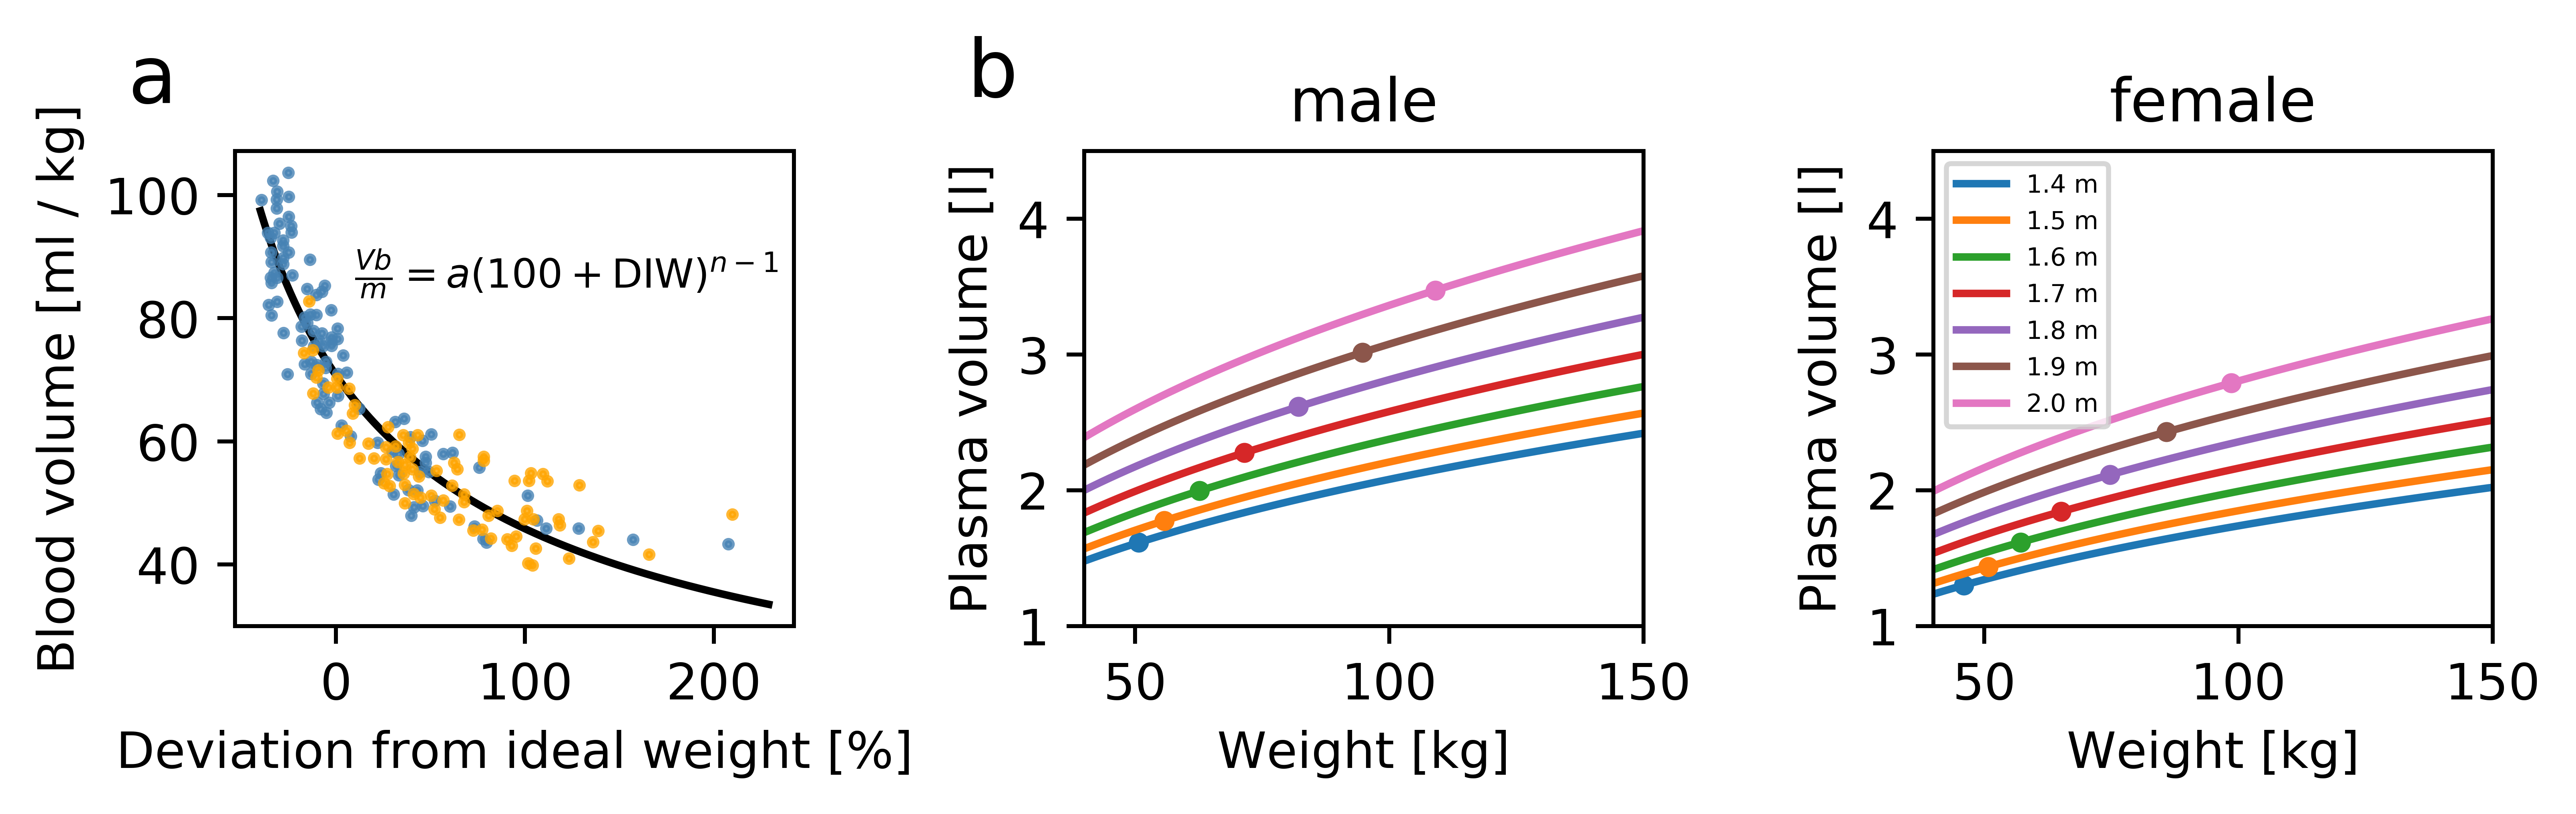

In [9]:
fig, axarr = plt.subplots(1, 3, figsize=(7.25, 7.25/3), dpi=900)

ax = axarr[0]

Dev = np.arange(-40, 230)

ax.plot(Dev, g(Dev, *params), color='black')
ax.plot(data['div'][data['male'] == True], data['bv'][data['male'] == True], '.', color='steelblue', alpha=0.8,
        label='male', markersize=3.0)
ax.plot(data['div'][data['male'] == False], data['bv'][data['male'] == False], '.', color='orange', alpha=0.8,
        label='female', markersize=3.0)
ax.set_xlabel('Deviation from ideal weight [%]')
ax.set_ylabel('Blood volume [ml / kg]')
#plt.savefig('Vp_fit.svg')

ax.text(10, 85, r"$\frac{Vb}{m} = a (100 + \mathrm{DIW})^{n-1}$", fontsize=8)
ax.text(-110, 115, "a", fontsize=16)
#ax.legend(loc='best', fontsize=7)


ax = axarr[1]

heights = [1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0]
weight = np.arange(40, 150, 0.1)

for i, height in enumerate(heights):
    iw = ideal_weight(height, 'male')
    dev = 100.0 * (weight - iw) / iw
    ax.plot(weight, hem('male') * weight * g(dev, *params) / 1000,
             label=f'{height} m', color=f'C{i}')
    ax.plot(iw, hem('male') * iw * g(0, *params) / 1000, '.', color=f'C{i}')

ax.set_xlabel('Weight [kg]')
ax.set_ylabel('Plasma volume [l]')
ax.set_title('male')

ax.set_xlim(40, 150)
ax.set_ylim(1.0, 4.5)

#ax.legend(loc='best', fontsize=8)
ax.text(17, 4.9, "b", fontsize=16)

ax = axarr[2]

for i, height in enumerate(heights):
    iw = ideal_weight(height, 'female')
    dev = 100.0 * (weight - iw) / iw
    ax.plot(weight, hem('female') * weight * g(dev, *params) / 1000,
             label=f'{height} m', color=f'C{i}')
    ax.plot(iw, hem('female') * iw * g(0, *params) / 1000, '.', color=f'C{i}')

ax.set_xlabel('Weight [kg]')
ax.set_ylabel('Plasma volume [l]')
ax.set_title('female')

ax.set_xlim(40, 150)
ax.set_ylim(1.0, 4.5)
ax.legend(loc='best', fontsize=5)

plt.tight_layout()

plt.savefig("blood_volume.svg")
plt.savefig("blood_volume.eps")
plt.show()


##### Figure 2: Blood volume dependence on weight, height and sex
*a. Blood volume submodel* We compare Feldschuh's data [ref] (**Note: Check spelling and add ref**) relating blood volume per mass to the deviation from ideal weight with our fitted two-parameter blood volume submodel. Individual patients are shown as colored dots (blue:male, orange:female). The equation of our blood volume submodel is shown on top, and a least squares fit to the data is shown as a black line.

*b. Model predictions for the plasma volume.* The predicted blood plasma volume for male (left panel) and female (right panel) patients is plotted against patient weight. Predictions for patients of different heights, ranging from 1.4 to 2.0 m, are shown as separate curves. The Feldschuh ideal weight of a patient of the corresponding sex and height is shown as a dot. Our model assumes that both blood and plasma volume increase linearly with ideal weight, but sublinearly with deviations from the ideal weight (see Supplemental Information). For converting blood volume to plasma volume, we assume a hematocrit value of 0.45 for male and 0.4 for female patients.